## 1-1. MNIST 숫자 손글씨 데이터 분류 모델 만들기
데이터 준비->딥러닝 네트워크 설계->학습->테스트

## 1-2. 데이터 준비
### MNIST 숫자 손글씨 Dataset 불러들이기  
>참고문헌  
[MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력
print(x_train.shape)

2.5.0
60000
(60000, 28, 28)


### 학습용 데이터 vs 시험용 데이터

`(x_train, y_train), (x_test, y_test) = mnist.load_data()` 
- `(x_train, y_train)` : 학습용 데이터
- `(x_test, y_test)` : 시험용 데이터

1. train 데이터로 학습
2. test 데이터로 성능 테스트

> MNIST 데이터셋 
- 약 500명의 사용자가 작성한 숫자 이미지
- train/test
  - 250명/250명
  - 28x28
  - 60,000장/10,000장


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


※ train data vs test data  
참고문헌 : 데이터셋 이야기  
https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

---
불러들인 숫자 손글씨 이미지 하나를 출력해보자  
MNIST 데이터셋의 X항목(위 코드에서는 x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)입니다.

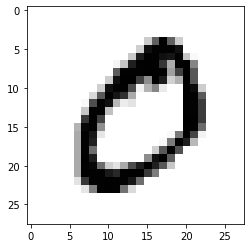

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값

In [ ]:
print(y_train[1])

0


다른 이미지 출력해보기

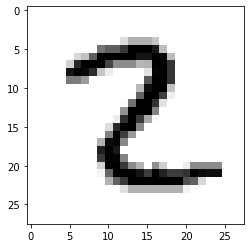

77 번째 이미지의 숫자는 바로  2 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=76     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

※ Matplotlib  
- 파이썬에서 제공하는 시각화(Visualization) 패키지
- 차트, 플롯(plot) 등 다양한 형태로 데이터 시각화 가능
> 참고 : [Matplotlib활용사례 보기](https://matplotlib.org/gallery.html)

### 데이터 전처리 하기
인공지능 모델 활용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시키는 것이 좋음

In [ ]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


MNIST 데이터셋 픽셀값 : 0~255  
=> min = 0 / max = 1로 만들기

In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 1-3. 딥러닝 네트워크 설계
### `Sequential Model` 사용하기
- Sequential API
  - 텐서플로우 keras
  - 자유도↓
  - 간단하게 딥러닝 모델 구현 가능
  - Functional API, 밑바닥부터 구현 ...

---
tf.keras의 Sequential API를 이용하여 LeNet(딥러닝 네트워크) 설계

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


**Conv2D 레이어 첫번째 인자**
- 사용하는 이미지 특징 수
- 16개의 이미지 특징 고려 후 32개 특징 고려
- 강아지 등의 복잡한 이미지의 경우 숫자↑

**input_shape**
- 입력이미지의 형태

**Dense 레이어의 첫 번째 인자**
- 분류기에 사용되는 뉴런의 숫자
- 값이 클수록 복잡한 분류기 구현 가능
- ex) 알파벳 구분 : 대문자26+소문자26 총 52개 클래스를 분류해야 하므로, 64, 128을 고려할 수 있음

**마지막 Dense 레이어의 뉴런 숫자**
- 결과적으로 분류해 내야 하는 클래스 수
- ex) 숫자 인식기 : 10, 알파벳 인식기 : 52

In [ ]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1-4. 딥러닝 네트워크 학습시키기
[1-3](##-1-3.-딥러닝-네트워크-설계) 구현한 네트워크의 입력 : `(데이터개수, 이미지크기 x, 이미지크기 y, 채널수)`  
- `input_shape=(28,28,1)`




In [ ]:
print(x_train.shape)

(60000, 28, 28)


**채널수에 대한 정보가 없음**  
- (60000, 28, 28) => (60000, 28, 28, 1)
- 채널수 : 1(흑백), 3(RGB)

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


x_train 학습 데이터로 딥러닝 네트워크 학습하기  
epochs=10 : 전체 60000 데이터를 10번 반복학습

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0761 - accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0496 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0211 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 30s 16m

>학습이 진행됨에 따라 `accuracy`(인식 정확도)가 올라감  
9 epoch부터는 accuracy의 상승률이 적으므로 10 epoch 학습이 적절해보임


## 1-5. 테스트 데이터로 성능 확인하기

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0966 - accuracy: 0.9712
test_loss: 0.09662026166915894 
test_accuracy: 0.9711999893188477


0.9962를 (10 apoch) 예상했지만 accuracy가 0.9712로 나옴  
train data와 test data의 손글씨 주인이 다르기 때문

### 잘못 추론한 데이터 확인하기
`model.evaluate()`가 아닌 `model.predict()`사용시 실제 추론한 확률분포 출력 가능함  
(구현한 모델 : 10개의 숫자 중 어떤 숫자일지에 대한 확률값을 출력하는 함수)

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.5224613e-08 3.9944901e-09 2.5805895e-07 1.3842769e-05 3.1046701e-09
 1.5808346e-11 6.9844398e-17 9.9997938e-01 3.8586765e-09 6.5876388e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


7번째 인덱스의 값이 가장 큼  
idx=0의 실제 값 확인

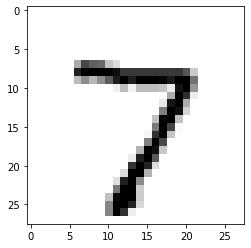

7

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()
y_test[idx]

model의 predict와 실제 label이 다른 경우 확인해보자

예측확률분포: [3.93122826e-11 5.77598751e-01 2.30467947e-08 6.91021068e-12
 1.27490045e-08 1.84226096e-07 4.22400594e-01 1.18578151e-12
 4.72959641e-07 2.04348718e-13]
라벨: 6, 예측결과: 1


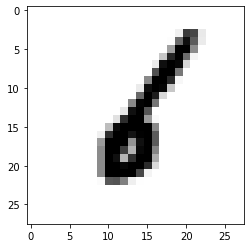

예측확률분포: [3.2646712e-06 4.2870167e-01 3.9307829e-03 1.4947340e-01 1.4916090e-05
 5.9331971e-04 2.9136059e-08 2.2813234e-02 3.4710935e-01 4.7360029e-02]
라벨: 8, 예측결과: 1


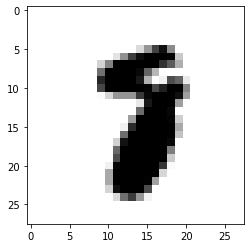

예측확률분포: [4.8975789e-11 2.5756578e-03 9.9211723e-01 5.5604556e-05 2.2560313e-05
 5.4384259e-13 3.0820036e-14 5.1777423e-03 7.9030826e-07 5.0448511e-05]
라벨: 7, 예측결과: 2


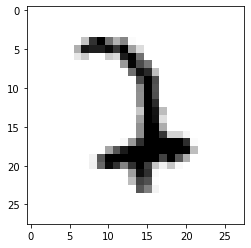

예측확률분포: [3.1582738e-12 1.5116586e-04 4.8260558e-01 7.1227580e-04 5.8567452e-13
 4.5154530e-14 1.2545989e-11 5.6816464e-08 5.1653093e-01 7.3458295e-11]
라벨: 2, 예측결과: 8


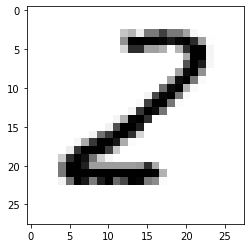

예측확률분포: [1.12024004e-07 4.42657061e-02 3.55004113e-06 2.52714131e-06
 1.82229307e-08 1.24339431e-06 2.29535401e-11 1.10505134e-01
 8.45220745e-01 8.75803721e-07]
라벨: 7, 예측결과: 8


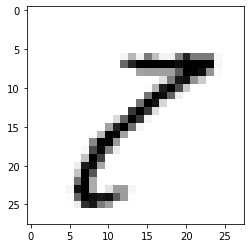

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1-6. 더 좋은 딥러닝 네트워크 구현해보기
- 1-3.의 Conv2D 레이어에서 입력 이미지 특징수 변화시켜보기
- Dense 레이어에서 뉴런수를 바꾸어 보기
- epoch값 변경해보기

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1= 32 #16    # 개의 특징 고려
n_channel_2= 64 #32    # 후 channel_2개의 이미지 특징 고려
n_dense=32        # 값 클수록 복잡한 분류기 구현가능
n_train_epoch=15 #10  # 반복학습

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

n_channel_1=32  
n_channel_2=64  
n_dense=32  
n_train_epoch=10  
test_accuracy: 0.9914000034332275  

흠 ..